# Imports

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set Globals & Functions

In [64]:
def checkData(x):
    print(f"\nInfo dos valores:\n")
    print(x.info())
    print(f"\nDescrição dos dados:\n\n{x.describe()}")
    return

def checkNaN(x):
    """This function receives a DataFrame and returns the count of NaN values for each column."""
    null_count = x.isna().sum()
    non_null_count = x.notnull().sum()
    print(f"Null values:\n {null_count}")
    print(f"Non-null values:\n {non_null_count}")
    return

def checkOutliers(x):
    """This functions receives a DataFrame and returns a DataFrame with the outliers.
    It takes as premise that the data is normally distributed."""
    dfOutliers  = pd.DataFrame()
    # Itera sobre as colunas númericas
    for column in x.select_dtypes(include=[np.number]).columns:
        # Calcula o 1 quartil (Q1)
        Q1 = x[column].quantile(0.25)
        # Calcula o 3 quartil (Q3)
        Q3 = x[column].quantile(0.75)
        # Calcula o Intervalo Interquartil (IQR)
        IQR = Q3 - Q1
        # Define os limites inferior e superior para outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identica os outliers da coluna atual e adiciona ao DataFrame de outliers
        outliers = x[(x[column] < lower_bound) | (x[column] > upper_bound)]
        # Concatene os outliers da coluna atual ao DataFrame de outliers
        dfOutliers = pd.concat([dfOutliers, outliers])
    outliersData = dfOutliers.drop_duplicates().reset_index(drop=True)
    return outliersData

def corr(x):
    plt.figure(figsize=(10,8))
    sns.heatmap(x.select_dtypes(include=[np.number]).corr(), annot=True)
    plt.show()
    return

def hist(x):
    """This function receives a DataFrame and returns a histogram of the data."""
    x.hist(bins=50, figsize=(25,10))
    plt.show()
    return




# Data Loading & Check

In [65]:
df_raw = pd.read_csv("train.csv")

In [66]:
checkData(df_raw)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4467 non-null   object 
 1   Delivery_person_ID           4467 non-null   object 
 2   Delivery_person_Age          4467 non-null   object 
 3   Delivery_person_Ratings      4467 non-null   object 
 4   Restaurant_latitude          4467 non-null   float64
 5   Restaurant_longitude         4467 non-null   float64
 6   Delivery_location_latitude   4467 non-null   float64
 7   Delivery_location_longitude  4467 non-null   float64
 8   Order_Date                   4467 non-null   object 
 9   Time_Orderd                  4467 non-null   object 
 10  Time_Order_picked            4467 non-null   object 
 11  Weatherconditions            4467 non-null   object 
 12  Road_traffic_density         4467 non-null   object 
 13

In [67]:
df_raw.sample(30)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
4318,0xdaca,GOARES11DEL01,34,5,15.544419,73.755736,15.614419,73.825736,14-02-2022,20:40:00,20:50:00,conditions Fog,Jam,2,Drinks,scooter,1,No,Metropolitian,(min) 45
1809,0x1f75,CHENRES02DEL03,38,4,13.086438,80.220672,13.116438,80.250672,01-04-2022,19:20:00,19:30:00,conditions Stormy,Jam,0,Drinks,motorcycle,0,Yes,Metropolitian,(min) 46
3302,0x912f,BANGRES19DEL03,32,4.8,12.914264,77.678400,12.944264,77.708400,05-04-2022,20:10:00,20:20:00,conditions Sunny,Jam,2,Meal,scooter,1,No,Urban,(min) 17
3660,0xaa16,MUMRES11DEL01,28,4.7,18.994237,72.825553,19.004237,72.835553,05-04-2022,09:00:00,09:05:00,conditions Sunny,Low,0,Meal,motorcycle,0,No,Metropolitian,(min) 10
3197,0xd7c9,KNPRES02DEL03,37,4.9,26.471617,80.313564,26.531617,80.373564,11-02-2022,17:15:00,17:25:00,conditions Sandstorms,Medium,0,Snack,motorcycle,1,No,Metropolitian,(min) 29
2231,0x9837,RANCHIRES01DEL02,30,4.9,23.416792,85.316842,23.436792,85.336842,05-04-2022,09:30:00,09:35:00,conditions Windy,Low,2,Drinks,scooter,1,No,Metropolitian,(min) 28
485,0xd446,ALHRES08DEL03,28,4.9,25.450329,81.834279,25.540329,81.924279,12-02-2022,22:15:00,22:20:00,conditions Sandstorms,Low,2,Drinks,electric_scooter,0,No,Metropolitian,(min) 10
4021,0xae87,SURRES04DEL02,30,5,21.173493,72.801953,21.193493,72.821953,07-03-2022,08:45:00,08:50:00,conditions Windy,Low,1,Snack,scooter,1,No,Metropolitian,(min) 27
238,0xdd96,KNPRES16DEL01,32,4.8,26.482581,80.315628,26.552581,80.385628,14-02-2022,21:00:00,21:10:00,conditions Sunny,Jam,2,Meal,scooter,1,No,Metropolitian,(min) 25
1686,0xa518,INDORES20DEL01,27,4.6,22.732225,75.874765,22.802225,75.944765,06-04-2022,23:50:00,23:55:00,conditions Cloudy,Low,0,Meal,motorcycle,1,No,NaN,(min) 22


# Clear & Transform

Clearly some columns have NaN values, but they are not appearing on the NaNs check. It can be because they are object types or are stored as string and have some weird formatting like " NaN", with a blank space.<br>First step will be to remove all spaces from string columns, then convert them to the appropiate type and fill with the most appropriate value.

## Strip spaces, fix typos and types

In [187]:
df_clear = df_raw.copy()
# Remove blank spaces from strings.
df_clear = df_clear.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# Convert to numeric types where needed.
df_clear["Delivery_person_Age"] = df_clear["Delivery_person_Age"].apply(pd.to_numeric, errors="coerce").astype("Int64")
df_clear["Delivery_person_Ratings"] = df_clear["Delivery_person_Ratings"].apply(pd.to_numeric, errors="coerce")
df_clear["multiple_deliveries"] = df_clear["multiple_deliveries"].apply(pd.to_numeric, errors="coerce").astype("Int64")
# Fix typo on column name
df_clear.rename(columns={"Time_Orderd": "Time_Ordered"}, inplace=True)
# Convert dates and times to datetime objects, than to string to better work with it later.
df_clear["Order_Date"] = pd.to_datetime(df_clear["Order_Date"], format="%d-%m-%Y").astype("string")
df_clear["Time_Ordered"] = pd.to_datetime(df_clear["Time_Ordered"], format="%H:%M:%S").dt.time.astype("string")
df_clear["Time_Order_picked"] = pd.to_datetime(df_clear["Time_Order_picked"], format="%H:%M:%S").dt.time.astype("string")
# Remove letters from the Column "Time_taken(min)" and change it to Int64
df_clear["Time_taken(min)"] = df_clear["Time_taken(min)"].str.extract(r'(\d+)').astype("Int64")


## Merge Dates and Times

To better work with time, "Order_date" will be merged with "Time_Ordered" and "Time_Order_picked". For the same reason "Time_taken(min)" will be transformed to a date.time based on "Time_Order_picked" + "Time_taken(secs)".

In [ ]:
# Merge date and time columns for better timestamp conversion
df_clear["Time_Ordered"] = pd.to_datetime(df_clear["Order_Date"] + " " + df_clear["Time_Ordered"], format="%Y-%m-%d %H:%M:%S")
df_clear["Time_Order_picked"] = pd.to_datetime(df_clear['Order_Date'] + " " + df_clear["Time_Order_picked"], format="%Y-%m-%d %H:%M:%S")
# Add 1 day to order made before midnight and delivered after
df_clear["Time_Order_picked"] = df_clear.apply(lambda row: row["Time_Order_picked"] + pd.Timedelta(days=1) if row["Time_Ordered"] > row["Time_Order_picked"] else row["Time_Order_picked"], axis=1)
# Calculate delivery time based on Time_order_pick + time_taken
df_clear["Time_Order_delivered"] = df_clear["Time_Order_picked"] + pd.to_timedelta(df_clear["Time_taken(min)"], unit="m")
# Drop unnecessary columns
df_clear.drop(["Order_Date", "Time_taken(min)"], axis=1, inplace=True)

In [ ]:
# Check if NaNs are treated as NaT and dates are correct
df_clear[["Time_Ordered", "Time_Order_picked", "Time_Order_delivered"]].sample(30)

,Time_Ordered,Time_Order_picked,Time_Order_delivered
3689,2022-02-16 22:50:00,2022-02-16 22:55:00,2022-02-16 23:37:00
191,2022-02-12 19:45:00,2022-02-12 19:50:00,2022-02-12 20:26:00
3746,2022-02-12 20:25:00,2022-02-12 20:30:00,2022-02-12 21:00:00
257,2022-03-10 22:50:00,2022-03-10 23:05:00,2022-03-10 23:22:00
3584,2022-03-21 11:20:00,2022-03-21 11:30:00,2022-03-21 11:56:00
2535,2022-03-11 23:35:00,2022-03-11 23:40:00,2022-03-11 23:58:00
2844,2022-03-03 09:35:00,2022-03-03 09:50:00,2022-03-03 10:04:00
740,2022-02-15 23:15:00,2022-02-15 23:25:00,2022-02-15 23:44:00
3255,2022-03-11 09:55:00,2022-03-11 10:10:00,2022-03-11 10:27:00
3703,2022-03-02 20:35:00,2022-03-02 20:40:00,2022-03-02 21:04:00


## Filling & Droping NaNs

NaNs on "Time_ordered" can be stipulated based on the other orders, grouped by type of order.<br>The thinking here is, buffets probably have a longer preparation time than meal, that have a longer time than drinks, that have a longer time than snacks.

In [ ]:
df = df_clear[["Time_Ordered", "Time_Order_picked", "Time_Order_delivered", "Type_of_order"]]
# ToDo: remove NaTs from df and apply (lambda x: x.apply(lambda y: y.timestamp())) to calculate time taken between each of them.
# ToDo: fill NaTs from df_clear with a timestamp based on the mean or median time taken between the preparation/picking/delivery of the same type of order times of each type of order.
.groupby(["Type_of_order"]).agg(["mean", "median"]).reset_index()
df

Type_of_order                  Time_Ordered                      \
                                         mean              median   
0        Buffet 2022-03-14 19:47:37.969639424 2022-03-14 23:00:00   
1        Drinks 2022-03-15 06:26:20.747126272 2022-03-16 18:50:00   
2          Meal 2022-03-14 08:39:56.422018560 2022-03-14 19:50:00   
3         Snack 2022-03-13 18:54:27.000000000 2022-03-13 17:15:00   

              Time_Order_picked                      \
                           mean              median   
0 2022-03-14 17:34:09.954170624 2022-03-15 17:40:00   
1 2022-03-15 06:56:40.738007296 2022-03-16 23:57:30   
2 2022-03-14 09:58:35.895196416 2022-03-15 10:45:00   
3 2022-03-13 20:08:50.950305024 2022-03-14 21:25:00   

           Time_Order_delivered                      
                           mean              median  
0 2022-03-14 18:00:16.608615936 2022-03-15 17:55:00  
1 2022-03-15 07:22:59.889298944 2022-03-17 00:19:30  
2 2022-03-14 10:24:41.344978176 2022-03-15 11:01:00  
3 2022-03-13 21:05:24.188481536 2022-03-14 22:01:00

Rows with more than 2 NaN values will be dropped.

In [50]:
df_clear = df_clear.dropna(thresh=len(df_clear.columns) - 2).reset_index(drop=True)

In [37]:
print(f"Delivery person age median: {df_clear['Delivery_person_Age'].median()}")
print(f"Delivery person age mean: {df_clear['Delivery_person_Age'].mean()}")

Delivery person age median: 29.0
Delivery person age mean: 29.450444132772322


The "Delivery_Person_Age" column is ~29 for both median and mean values, so lets fill the NaNs with de median, since its a Int and mean is a float.<br>A better approach would be apply a method like "KNN", but in this exercise let's stay on the basics.

In [24]:
df_clear["Delivery_person_Age"] = df_clear['Delivery_person_Age'].fillna(df_clear['Delivery_person_Age'].median())

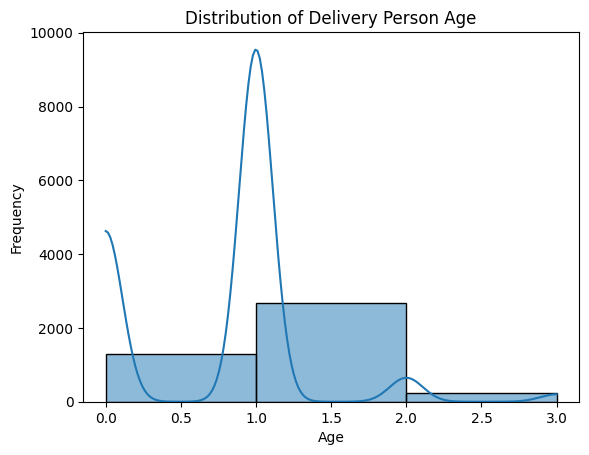

In [ ]:
sns.histplot(df_clear["multiple_deliveries"], kde=True, bins=range(int(df_clear["multiple_deliveries"].min()), int(df_clear["multiple_deliveries"].max()) + 1))
plt.title("Distribution of Delivery Person Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [15]:
df_work["Delivery_person_Age"].mean()

np.float64(29.450444132772322)

In [191]:
checkData(df_clear)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           4467 non-null   object        
 1   Delivery_person_ID           4467 non-null   object        
 2   Delivery_person_Age          4278 non-null   Int64         
 3   Delivery_person_Ratings      4272 non-null   float64       
 4   Restaurant_latitude          4467 non-null   float64       
 5   Restaurant_longitude         4467 non-null   float64       
 6   Delivery_location_latitude   4467 non-null   float64       
 7   Delivery_location_longitude  4467 non-null   float64       
 8   Time_Ordered                 4288 non-null   datetime64[ns]
 9   Time_Order_picked            4467 non-null   datetime64[ns]
 10  Weatherconditions            4467 non-null   object        
 11  Road_traffic_density   

In [51]:
checkData(df_clear)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4292 entries, 0 to 4291
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           4292 non-null   object        
 1   Delivery_person_ID           4292 non-null   object        
 2   Delivery_person_Age          4278 non-null   Int64         
 3   Delivery_person_Ratings      4272 non-null   float64       
 4   Restaurant_latitude          4292 non-null   float64       
 5   Restaurant_longitude         4292 non-null   float64       
 6   Delivery_location_latitude   4292 non-null   float64       
 7   Delivery_location_longitude  4292 non-null   float64       
 8   Order_Date                   4292 non-null   datetime64[ns]
 9   Time_Ordered                 4288 non-null   datetime64[ns]
 10  Time_Order_picked            4292 non-null   datetime64[ns]
 11  Weatherconditions      

# Feature Enginnereering

In [8]:
df_work = df_clear.copy()